

Pippard nonlinear oscillators sweeps. Sections in Landau
Folding over of resonance diagram
  
Parametric oscillators kapitsa
Probablaistic ensemble of oscillators


Frequency sepctrum shifting, becomes assymmetirc
folding over into catastrsophe
higher resoancnes appearing
synahcronization spontaenous

self consistent approximations
"mean field"
adiabatic approximations
effective parameters
Picard Lindelhof  x_n+1 = x0 +  integ  G(<x>, t) * x(t)

Adiabatic turning on and off of potentials. https://en.wikipedia.org/wiki/Adiabatic_invariant
action angle coords https://en.wikipedia.org/wiki/Action-angle_coordinates. What is the numerical notion of this anyway. Uhh...

Things that aren't robust to inaccuraices of the solver are suspect physical phenonomenon anyway
classical Berry phase https://en.wikipedia.org/wiki/Geometric_phase
foucault pendulum



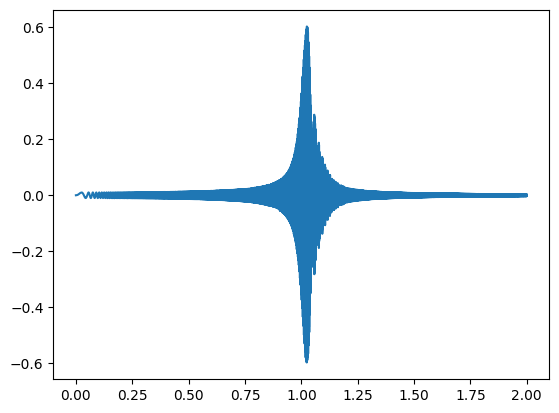

In [56]:
import scipy as sp
import numpy as np


T = 10000
omega0 = 0
omega1 = 2
def omega(t):
    return omega0 + (omega1 - omega0) * t/T

def phase(t):
    return omega0 * t + (omega1 - omega0) * t* t /T / 2

def df(t, y):
    x, v = y
    # sweep frequencies. spring force + external drive + damping 
    a = -x + 0.01 * np.sin(phase(t)) - 0.01 * v # + non linear term
    return [v, a]

y0 = [0, 0]
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
sol = sp.integrate.solve_ivp(df, [0, T], y0)
sol

import matplotlib.pyplot as plt
plt.plot(omega(sol.t), sol.y[0])
#plt.plot(sol.t[1:], np.diff(omega(sol.t)*sol.t) )
# this picture surpises me by a facor of two. oooh the derviative of omega(t) ... hmm.


In [54]:
omega(T)

1.0

https://dsp.stackexchange.com/questions/13514/how-to-estimate-the-frequency-at-certain-time-of-linear-sine-sweep
http://en.wikipedia.org/wiki/Chirp

In [39]:
import sympy
from sympy.abc import x,t,omega

x = sympy.Function("x")
v = sympy.Derivative(x(t), t)
a = sympy.Derivative(v, t)

result = sympy.dsolve(sympy.Eq(a, -x(t) + sympy.sin(t * t)), x(t)) #  - 0.01 * v
result

Eq(x(t), C1*sin(t) + C2*cos(t) - sin(omega*t)/(omega**2 - 1))

# Scattering

In [ ]:
def df(t, z):
    x = z[:,0]
    v = z[:,1]
    a = -x / np.norm(x)**3
    return np.hstack([v, a]).flatten()

T = 1000
v = [1,0] # forward moving
x = [-T*v[0]/2,1] # far tho the left and a little up

y0 = np.hstack(x,v).flatten() 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
sol = sp.integrate.solve_ivp(df, [0, T], y0)
sol

Internal degrees of freedom in the scattering center.

We could just stop it, or use a closed form approximate extrapolation to infinity, like a born/picard thing.
This is the analog of just truncating the domain or coupling to infinite wave solutions.

Closed form solutions
The hard sphere potential

https://williamsgj.people.charleston.edu/Scattering%20Theory.pdf

Doing the hard sphere computationally becomes geometrical reasoning.
collision point equations
x = x0 + tvx
y = y0 + tvy
x*2 + y **2 = 1
mirror equations

Amenable to polynomial methods.



power laws
lennard jones

geometrical optical scattering. Interesting to think about. Differential snell's law.
A hard refractive sphere. Can snell be expressed algerbrically?
vx1 = vx2
n1 v1 = n2 v2
vy1^2 + vx1^1 = v1^2
That seems to work.

Can we determine the lens by looking at some known thing is the analog of a scattering experiment.


# balls and springs


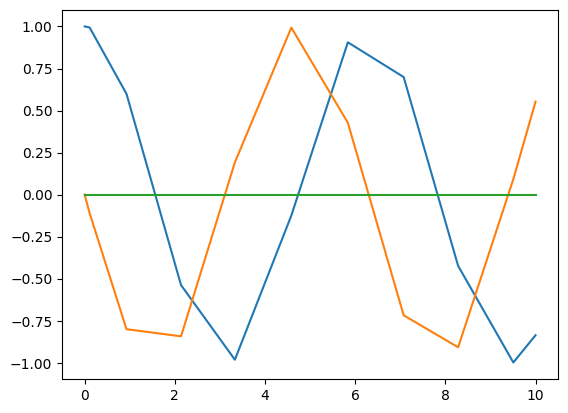

In [78]:
T = 10
N = 10
def df(t, x):
    x = x.reshape((N,2))
    v = x[:,1]
    a = -x[:,0] # + focring functions
    return np.stack([v,a],axis=1).flatten()

y0 = np.zeros((N, 2))
y0[0,0] = 1
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
sol = sp.integrate.solve_ivp(df, [0, T], y0.flatten())
sol
y = sol.y.reshape((N,2,len(sol.t)))
plt.plot(sol.t, y[0,0,:])
plt.plot(sol.t, y[0,1,:])
plt.plot(sol.t, y[1,0,:])

# Misc 





Scattering experiments might be fun.
Coulomb rutherford style. I did that once
"Effective" charge of some cluster of charged points


Out of the box wave equation solver?
https://scipython.com/blog/the-two-dimensional-wave-equation/
https://scipython.com/blog/the-electric-field-of-a-capacitor/


https://scipython.com/chem/articles/balancing-a-chemical-reaction/ integer diophantine eqs for chemical balance


dedalus fenics

bogolibov methods in nonlinear oscialltors. That op amp course.

Electrical oscillators. Armstrong and other. Really confused me.
Bender Orszag

https://www.reddit.com/r/Python/comments/1ca4bwy/what_is_currently_the_fasteststateoftheart_ode/
https://docs.kidger.site/diffrax/
https://github.com/Nicholaswogan/numbalsoda
https://github.com/SciML/DifferentialEquations.jl https://github.com/SciML/diffeqpy
https://pydstool.github.io/PyDSTool/FrontPage.html
https://github.com/esa/torchquad
https://github.com/rtqichen/torchdiffeq
https://github.com/Zymrael/awesome-neural-ode

It's not crazy to trty juli


In [1]:
#https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython
import juliacall

[juliapkg] Found dependencies: /home/philip/.local/lib/python3.10/site-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /home/philip/.local/lib/python3.10/site-packages/juliapkg/juliapkg.json
[juliapkg] Locating Julia ~1.6.1, ~1.7, ~1.8, ~1.9, =1.10.0, ^1.10.3
[juliapkg] Installing Julia 1.10.4 using JuliaUp
[juliapkg] Using Julia 1.10.4 at /home/philip/.julia/juliaup/julia-1.10.4+0.x64.linux.gnu/bin/julia
[juliapkg] Using Julia project at /home/philip/.julia/environments/pyjuliapkg
[juliapkg] Installing packages:
           julia> import Pkg
           julia> Pkg.Registry.update()
           julia> Pkg.add([Pkg.PackageSpec(name="PythonCall", uuid="6099a3de-0909-46bc-b1f4-468b9a2dfc0d")])
           julia> Pkg.resolve()
           julia> Pkg.precompile()


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed UnsafePointers ─ v1.0.0
   Installed micromamba_jll ─ v1.5.8+0
   Installed CondaPkg ─────── v0.2.22
   Installed MicroMamba ───── v0.1.14
   Installed Pidfile ──────── v1.3.0
   Installed PythonCall ───── v0.9.20
    Updating `~/.julia/environments/pyjuliapkg/Project.toml`
  [6099a3de] + PythonCall v0.9.20
    Updating `~/.julia/environments/pyjuliapkg/Manifest.toml`
  [992eb4ea] + CondaPkg v0.2.22
  [9a962f9c] + DataAPI v1.16.0
  [e2d170a0] + DataValueInterfaces v1.0.0
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [692b3bcd] + JLLWrappers v1.5.0
  [0f8b85d8] + JSON3 v1.14.0
  [1914dd2f] + MacroTools v0.5.13
  [0b3b1443] + MicroMamba v0.1.14
  [bac558e1] + OrderedCollections v1.6.3
  [69de0a69] + Parsers v2.8.1
  [fa939f87] + Pidfile v1.3.0
  [aea7be01] + PrecompileTools v1.2.1
  [21216c6a] + Preferences v1.4.3
  [6099a3de] + PythonCall v0.9.20
  [ae029012] + Requires v1.3.0

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [4]:
%%julia
typeof(1 + 1)

Int64